In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

# Salary

In [2]:
salary = pd.read_csv("../data/net_salary_per_town_categories.csv", dtype={"CODGEO": str}, usecols=["CODGEO", "LIBGEO", "SNHM14"])

In [3]:
salary.columns = ["codgeo", "libgeo", "net_salary"]

In [4]:
salary.head()

,codgeo,libgeo,net_salary
0,01004,Ambérieu-en-Bugey,13.7
1,01007,Ambronay,13.5
2,01014,Arbent,13.5
3,01024,Attignat,12.9
4,01025,Bâgé-la-Ville,13.0


In [5]:
salary.shape

(5136, 3)

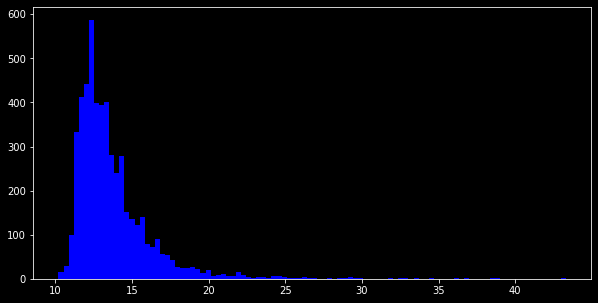

In [6]:
with plt.style.context("dark_background"):
    plt.figure(figsize=(10, 5))
    plt.hist(
        salary["net_salary"],
        bins=100,
        color="b"
    )

In [7]:
salary.sort_values("net_salary", ascending=False).head()

,codgeo,libgeo,net_salary
4225,78571,Saint-Nom-la-Bretèche,43.3
4170,78233,Feucherolles,38.7
4173,78251,Fourqueux,38.6
4872,92051,Neuilly-sur-Seine,36.7
4237,78650,Le Vésinet,36.3


In [8]:
salary[salary["libgeo"].apply(lambda x: "Paris" in x)]

,codgeo,libgeo,net_salary
1808,38485,Seyssinet-Pariset,14.5
3211,62826,Le Touquet-Paris-Plage,16.7
3923,75056,Paris,22.2
4989,95176,Cormeilles-en-Parisis,17.9


In [9]:
salary[salary["libgeo"].apply(lambda x: "Lyon" in x)]

,codgeo,libgeo,net_salary
1925,42059,Chazelles-sur-Lyon,12.2
3609,69123,Lyon,15.9
3630,69202,Sainte-Foy-lès-Lyon,19.0


In [10]:
salary[salary["libgeo"].apply(lambda x: "Marseille" in x)]

,codgeo,libgeo,net_salary
397,13055,Marseille,13.8


# Population

In [11]:
population = pd.read_csv("../data/population.csv", dtype={"CODGEO": str}, usecols=["CODGEO", "NB"])

population.columns = ["codgeo", "population"]
population.head()

,codgeo,population
0,01001,15
1,01001,15
2,01001,20
3,01001,20
4,01001,20


In [12]:
population = population.groupby("codgeo").sum().reset_index()
population.head()

,codgeo,population
0,01001,765
1,01002,227
2,01004,13460
3,01005,1595
4,01006,84


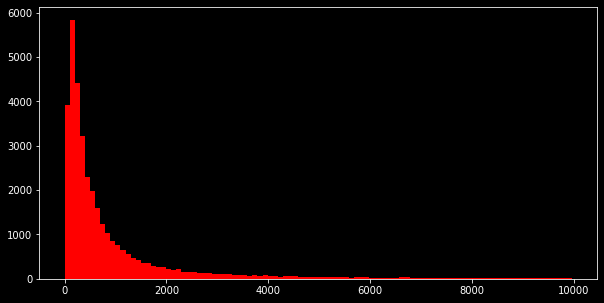

In [13]:
with plt.style.context("dark_background"):
    plt.figure(figsize=(10, 5))
    plt.hist(
        population["population"][population["population"] < 10000],
        bins=100,
        color="r"
    )

# Merging

In [14]:
df = pd.merge(
    left=salary,
    right=population,
    on=["codgeo"],
    how="left"
)

In [15]:
df.head()

,codgeo,libgeo,net_salary,population
0,01004,Ambérieu-en-Bugey,13.7,13460.0
1,01007,Ambronay,13.5,2563.0
2,01014,Arbent,13.5,3281.0
3,01024,Attignat,12.9,3329.0
4,01025,Bâgé-la-Ville,13.0,3142.0


In [16]:
df.shape # no loss

(5136, 4)

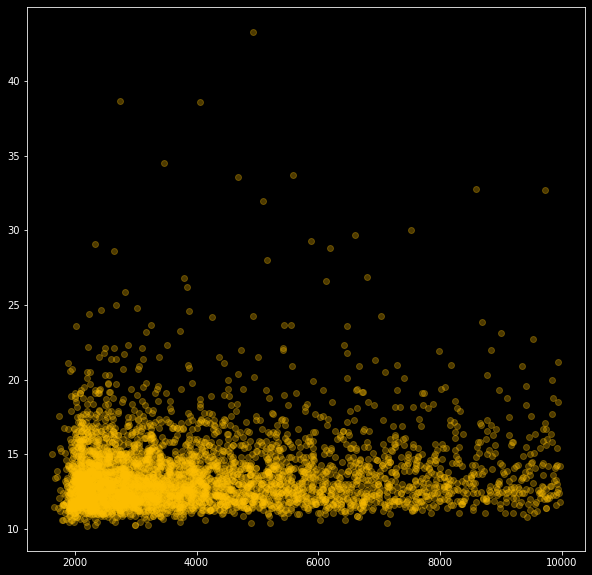

In [17]:
population_limit = 10000

gold_yellow = "#FFC000"

df_temp = df[df["population"] < population_limit]

with plt.style.context("dark_background"):
    plt.figure(figsize=(10, 10))
    plt.scatter(
        df_temp["population"],
        df_temp["net_salary"],
        color=gold_yellow,
        alpha=.3
    )
    plt.show()

# Geography

In [18]:
geography = gpd.read_file("../data/a-com2022.json", dtype={"codgeo": str})
geography.head()

,codgeo,libgeo,dep,reg,xcl2154,ycl2154,geometry
0,01001,L'Abergement-Clémenciat,01,84,848241,6563021,"POLYGON ((4.90497 46.16079, 4.90280 46.15795, ..."
1,01002,L'Abergement-de-Varey,01,84,887495,6548152,"POLYGON ((5.40440 46.00778, 5.41628 46.00056, ..."
2,01004,Ambérieu-en-Bugey,01,84,882724,6542583,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
3,01005,Ambérieux-en-Dombes,01,84,847277,6545791,"POLYGON ((4.88657 46.01602, 4.88808 46.01061, ..."
4,01006,Ambléon,01,84,902191,6519791,"POLYGON ((5.59066 45.75997, 5.58396 45.76274, ..."


In [19]:
unique_cities = set(df["codgeo"])

geography = geography[geography["codgeo"].isin(unique_cities)]

geography = geography.drop(["libgeo"], axis=1)

In [20]:
geography.shape # a bit of loss

(5076, 6)

In [21]:
df = geography.merge(
    right=df,
    on=["codgeo"],
    how="right"
)

df.shape

(5136, 9)

In [22]:
regions_to_drop = ["02", "06", "03", "04", "94", "01"]

df = df[-df["reg"].isin(regions_to_drop)]

df = df.dropna()

df.shape

(4963, 9)

In [23]:
df.head()

,codgeo,dep,reg,xcl2154,ycl2154,geometry,libgeo,net_salary,population
0,01004,01,84,882724.0,6542583.0,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ...",Ambérieu-en-Bugey,13.7,13460.0
1,01007,01,84,882682.0,6548067.0,"POLYGON ((5.40440 46.00778, 5.39779 46.01009, ...",Ambronay,13.5,2563.0
2,01014,01,84,906407.0,6580780.0,"POLYGON ((5.71332 46.25667, 5.71983 46.25783, ...",Arbent,13.5,3281.0
3,01024,01,84,866161.0,6578890.0,"POLYGON ((5.16256 46.25622, 5.16464 46.25629, ...",Attignat,12.9,3329.0
4,01025,01,84,849782.0,6581485.0,"POLYGON ((4.92091 46.30781, 4.92544 46.31070, ...",Bâgé-la-Ville,13.0,3142.0


In [25]:
df.to_file("../data/clean_data.geojson", index=False)